In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

mean = np.array([2.42133724e-01, 3.53929109e+01, 5.65093375e+00, 3.28035396e+01,
       7.10569596e+02])

deviation = np.array([3.19125750e-01, 1.03769224e+01, 4.09504378e+00, 5.76750601e+00,
       4.16803691e+02])
def denormalize(data, mean, deviation):
    assert data.shape[1] == mean.shape[0]
    assert data.shape[1] == deviation.shape[0]
    return (data * deviation + mean)

In [21]:
ndf = pd.read_csv("../../Inverter_1_2017-04-01/Inverter_1_2017-04-01.csv")
train = np.load("../../Inverter_1_2017-03-30/train.npy")
test = np.load("../../Inverter_1_2017-03-30/test.npy")
print (train.shape , test.shape)
df = pd.DataFrame(np.vstack((train,test)),columns=ndf.columns)
x_train = df[df.columns[1:]]
x_train = (x_train - mean)/deviation

(5144, 6) (1287, 6)


In [22]:
df.to_csv("../../Inverter_1_2017-03-30/Inverter_1_2017-03-30.csv",sep=",",index=False)

Index(['irradiation', 'module_temperature', 'windspeed', 'ambient_temp',
       'minute'],
      dtype='object')


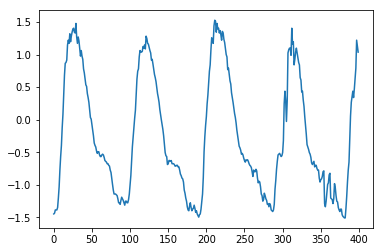

In [23]:
x_train.module_temperature[:400].plot()
print(x_train.columns)

In [24]:
B = pd.read_csv('B.csv')
B = B.T.values[1:, :]
Z = pd.read_csv('Z.csv')
Z = Z.T.values[1:, :]

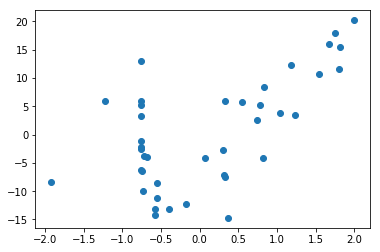

In [5]:
values = B[:, 0] 
labels = Z[:]
plt.scatter(values, Z)
plt.show()

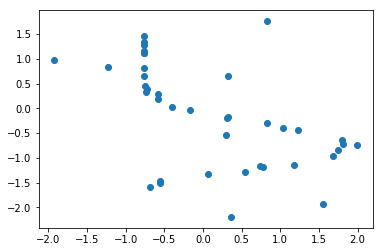

In [6]:
irr = B[:, 0]
time = B[:, -1]
plt.scatter(irr, time)

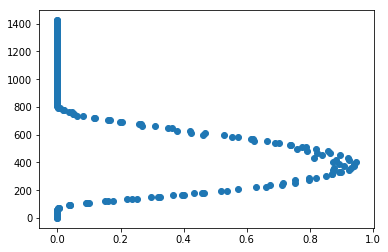

In [7]:
irr_data = df.irradiation.values[:200]
time_data = df.minute.values[:200]
plt.scatter(irr_data, time_data)

In [8]:
import scipy.cluster

centers, labels = scipy.cluster.vq.kmeans2(x_train, 100, iter=300)

/usr/local/lib/python3.6/dist-packages/scipy/cluster/vq.py:525: UserWarning: One of the clusters is empty. Re-run kmeans with a different initialization.
  warnings.warn("One of the clusters is empty. "


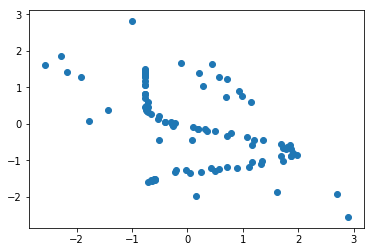

In [9]:
irr_centers = centers[:, 0]
time_centers = centers[:, -1]
plt.scatter(irr_centers, time_centers)

In [40]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [65]:
df.values[-1287:]

(1287, 6)

In [58]:
bonsai_preds = pd.read_csv("../../Inverter_1_2017-03-30/preds.csv")

(1287, 2)

In [76]:
arr = np. array([[-1.2471579 , -0.04882629,  2.9638474 ,  0.35919178, -1.6388032 ],
       [-1.2591225 , -0.8122826 , -1.1043184 ,  3.3080094 ,  2.5660367 ],
       [ 0.07322095, -1.5480732 , -0.20306994, -1.4728229 , -0.1989526 ],
       [-1.6471297 , -1.8959007 ,  2.229688  , -4.151749  , -4.6418676 ],
       [ 1.4105711 , -1.4714193 , -0.8260736 , -0.46372676,  1.1011689 ],
       [ 2.1941164 , -1.7342483 , -0.8357287 , -2.1237776 ,  0.13478331],
       [-1.3208553 , -1.2313219 ,  1.6127964 , -1.6884081 , -2.2001886 ],
       [ 0.55705535, -2.243286  , -0.12682338, -4.6751328 , -2.535424  ],
       [-1.0643661 ,  0.34575233,  1.8664303 ,  2.5257847 ,  0.56288886],
       [ 3.0940864 , -1.4516361 , -1.570948  , -0.04667723,  2.0173132 ]],
      dtype=np.float32)


array([-1.2471579 , -0.04882629,  2.9638474 ,  0.35919178, -1.6388032 ],
      dtype=float32)

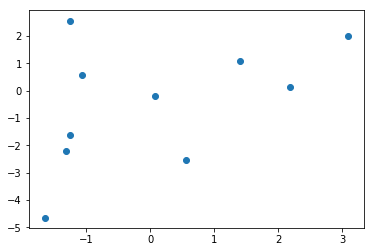

In [77]:
plt.figure()
plt.scatter(arr[:,0],arr[:,-1])
plt.show()

Text(0.5,0,'regression')

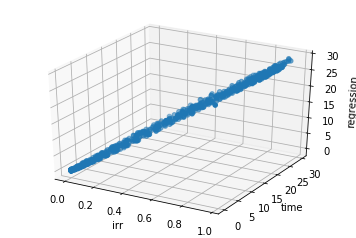

In [67]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
xs = df.values[-1287:,1]
#ys = df.values[-1287:,-1]
ys = df.values[-1287:,0]
zs = bonsai_preds.values[:,0]
ax.scatter(xs, ys, zs)
ax.set_xlabel('irr')
ax.set_ylabel('time')
ax.set_zlabel('regression')

Text(0.5,0,'regression')

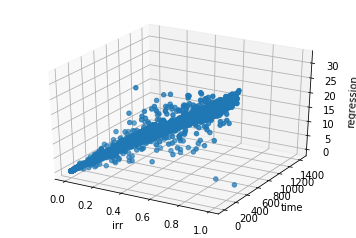

In [53]:
'''
Visualizing Bonsai predictions on Inverter_1_2017-03-30. 
'''
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#fig , ax = plt.subplots(111)
xs = df.values[:,1]
ys = df.values[:,-1]
zs = df.values[:,0]
ax.scatter(xs, ys, zs)
#ax.scatter(xs, ys)
ax.set_xlabel('irr')
ax.set_ylabel('time')
ax.set_zlabel('regression')

In [12]:
preds = pd.read_csv("40np-Ppreds.csv")

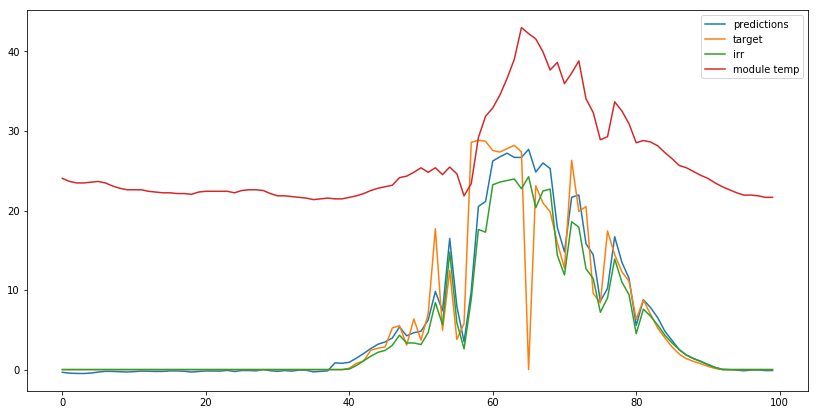

In [13]:
plt.figure(figsize=(14,7))
slice_ = slice(6300,6400)
plt.plot(preds.values[slice_][:, 0], label='predictions')
plt.plot(preds.values[slice_][:, 1], label='target')
plt.plot(df.values[slice_][:, 1] * 25,  label='irr ')
plt.plot(df.values[slice_][:, 2] * 0.75, label='module temp')
plt.legend()

In [14]:
df

,active_power,irradiation,module_temperature,windspeed,ambient_temp,minute
0,0.000,0.000000,20.361681,1.887097,22.903226,15.0
1,0.000,0.000000,20.488759,2.540323,23.411535,30.0
2,0.000,0.000000,20.997067,2.758065,23.157380,45.0
3,0.000,0.000000,20.997067,1.669355,23.157380,60.0
4,0.307,0.002737,20.997067,2.104839,23.411535,75.0
5,1.231,0.039883,21.378299,1.451613,24.682307,90.0
6,2.521,0.100489,22.903226,2.540323,26.334311,105.0
7,4.737,0.174780,24.682307,3.846774,26.969697,120.0
8,6.527,0.251026,27.350929,6.459677,27.859238,135.0
9,8.399,0.325318,29.511241,5.370968,28.367546,150.0


In [2]:
import numpy as np
a = np.array([1,0,1])

In [3]:
np.inverse(a)

AttributeError: module 'numpy' has no attribute 'inverse'